In [5]:
import numpy as np 
import pandas as pd 
from subprocess import check_output


In [7]:
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
%matplotlib inline

import plotly as py
import plotly.graph_objs as go
py.offline.init_notebook_mode(connected=True)

In [9]:
df = pd.read_csv("D:/3-1/BDE/lab/Pokemon.csv") 

In [12]:
df.columns = df.columns.str.upper().str.replace("_", " ")


In [13]:
df = df.set_index("NAME")

In [15]:
df = df.drop(["ID"], axis=1)

In [16]:
df.index = df.index.str.replace(".*(?=Mega)", "")

In [17]:
df["TYPE 2"].fillna(df["TYPE 1"], inplace=True)
df.head()

,TYPE 1,TYPE 2,TOTAL,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY
NAME,,,,,,,,,,,
Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
Charmander,Fire,Fire,309,39,52,43,60,50,65,1,False


In [18]:
df_summary = df.describe()
print(df_summary)

           TOTAL          HP      ATTACK     DEFENSE     SP. ATK     SP. DEF  \
count  800.00000  800.000000  800.000000  800.000000  800.000000  800.000000   
mean   435.10250   69.258750   79.001250   73.842500   72.820000   71.902500   
std    119.96304   25.534669   32.457366   31.183501   32.722294   27.828916   
min    180.00000    1.000000    5.000000    5.000000   10.000000   20.000000   
25%    330.00000   50.000000   55.000000   50.000000   49.750000   50.000000   
50%    450.00000   65.000000   75.000000   70.000000   65.000000   70.000000   
75%    515.00000   80.000000  100.000000   90.000000   95.000000   90.000000   
max    780.00000  255.000000  190.000000  230.000000  194.000000  230.000000   

            SPEED  GENERATION  
count  800.000000   800.00000  
mean    68.277500     3.32375  
std     29.060474     1.66129  
min      5.000000     1.00000  
25%     45.000000     2.00000  
50%     65.000000     3.00000  
75%     90.000000     5.00000  
max    180.000000     6

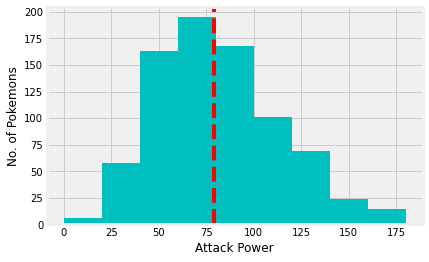

In [19]:
bins = range(0, 200, 20) 
plt.hist(df["ATTACK"], bins, histtype="bar", rwidth=1, color="c")
plt.xlabel("Attack Power")
plt.ylabel("No. of Pokemons")
plt.plot()
plt.axvline(df["ATTACK"].mean(), linestyle="dashed", color="r")
plt.show()

In [20]:
dragon = df[(df["TYPE 1"] == "Dragon") | (df["TYPE 2"] == "Dragon")] 
psychic = df[(df["TYPE 1"] == "Psychic") | (df["TYPE 2"] == "Psychic")] 
layout = go.Layout(title="Psychic vs Dragon",
                   yaxis=dict(title="Defence"),xaxis=dict(title="Attack"))
trace0 = go.Scatter(x=dragon.ATTACK, y=dragon.DEFENSE, mode="markers",
    name="Dragon",marker = dict(color="rgb(255,0,0)", size=8), text=dragon.index)
trace1 = go.Scatter(x=psychic.ATTACK, y=psychic.DEFENSE, mode="markers",
    name="Psychic",marker = dict(color="rgb(0,100,0)", size=8), text=psychic.index)
fig = go.Figure(data=[trace0, trace1], layout=layout)
py.offline.iplot(fig)

In [21]:


print("The total types of Pokemons are : ", df["TYPE 1"].unique())



The total types of Pokemons are :  ['Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Poison' 'Electric' 'Ground'
 'Fairy' 'Fighting' 'Psychic' 'Rock' 'Ghost' 'Ice' 'Dragon' 'Dark' 'Steel'
 'Flying']


In [22]:
def Poke_type_compare(type1, type2):
        t1 = type1.capitalize()
        t2 = type2.capitalize()
        title1 = t1 + " vs " + t2 + " "  + "Pokemons"

        poke1 = df[(df["TYPE 1"] == t1) | (df["TYPE 2"] == t1)]
        poke2 = df[(df["TYPE 1"] == t2) | (df["TYPE 2"] == t2)]

        layout = go.Layout(title= title1,
                               yaxis=dict(title="Defence Power"),xaxis=dict(title="Attack Power"))

        trace1 = go.Scatter(x=poke1.ATTACK, y=poke1.DEFENSE, mode="markers",
                name=t1, marker = dict(color="rgb(255,0,0)", size=8), text=poke1.index)

        trace2 = go.Scatter(x=poke2.ATTACK, y=poke2.DEFENSE, mode="markers",
                name=t2, marker = dict(color="rgb(0,100,0)", size=8), text=poke2.index)

        fig = go.Figure(data=[trace1, trace2], layout=layout)
        py.offline.iplot(fig)
    except Exception:
        print("Enter the names of pokemon types in lower.")
        
Poke_type_compare("water", "bug")
Poke_type_compare("grass", "normal")

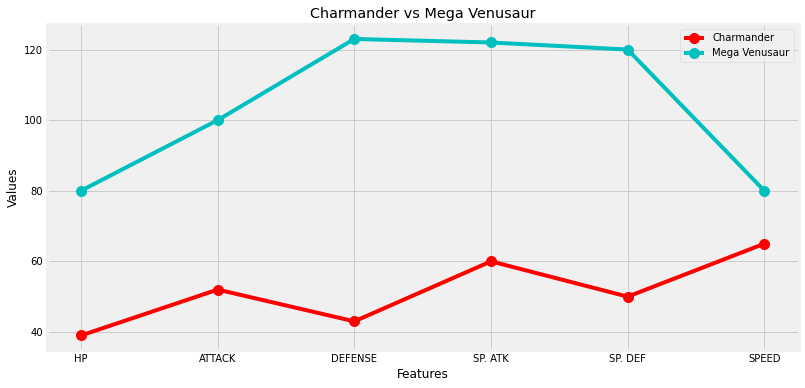

In [23]:
df_test = df.drop(["TYPE 1", "TYPE 2", "TOTAL", "GENERATION", "LEGENDARY"], axis=1)

def poke_compare(poke1, poke2):
    try:    
        df_test.loc[poke1].plot(color="r", marker="o", markersize=10 , label=poke1)
        df_test.loc[poke2].plot(color="c", marker="o", markersize=10, label=poke2)
        plt.xlabel("Features")
        plt.ylabel("Values")
        plt.title(poke1 + " vs " + poke2)
        fig = plt.gcf()
        fig.set_size_inches(12, 6)
        plt.legend()
        plt.show()
    except Exception:
        print("Please enter the correct names of the Pokemons")
    
poke_compare("Charmander", "Mega Venusaur")

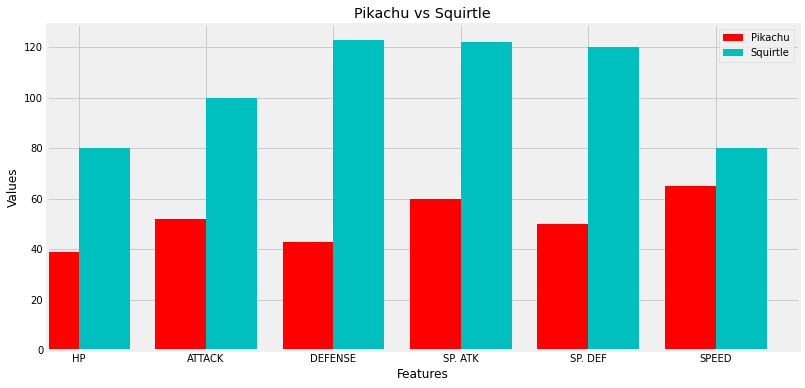

In [24]:
def poke_compare(poke1, poke2):
    try:
        fig = plt.figure()
        ax = fig.add_subplot(111)
        width = 0.4
        
        df_test.loc["Charmander"].plot(kind="bar", color="r", ax=ax,
                    width=width,position=1, label=poke1)
        
        df_test.loc["Mega Venusaur"].plot(kind="bar", color="c",
                    ax=ax, width=width, position=0, label=poke2)
        
        plt.xticks(rotation=0)
        plt.xlabel("Features")
        plt.ylabel("Values")
        plt.title(poke1 + " vs " + poke2)
        plt.legend()
        fig = plt.gcf()
        fig.set_size_inches(12, 6)
        plt.show()
    except Exception:
        print("Please enter the correct names of the Pokemons")
        
        
poke_compare("Pikachu", "Squirtle")

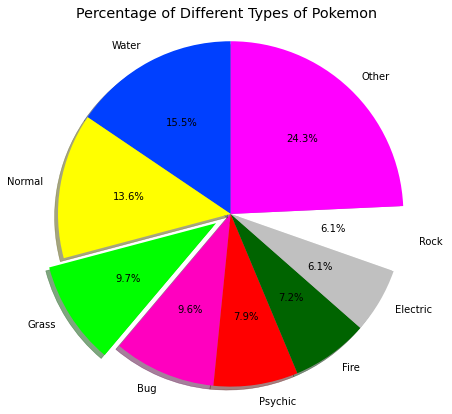

In [29]:
labels = 'Water', 'Normal', 'Grass', 'Bug', 'Psychic', 'Fire', 'Electric', 'Rock', 'Other'
sizes = [112, 98, 70, 69, 57, 52, 44, 44, 175]
colors = ['#0040ff', '#ffff00', '#00ff00', '#ff00bf', '#ff0000', '#006400', '#C0C0C0', '#FFFFFF', '#FF00FF']
explode = (0, 0, 0.1, 0, 0, 0, 0, 0, 0)  
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title("Percentage of Different Types of Pokemon")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(7,7)
plt.show()

